In [35]:
import pandas as pd



In [38]:
import numpy as np


In [40]:
import cv2


In [42]:
from tensorflow.keras.utils import to_categorical

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
import tensorflow as tf


In [49]:
from tensorflow.keras.models import Sequential


In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:

import matplotlib.pyplot as plt


In [27]:

import os

In [29]:
test_ = "archive (9)/test"

In [31]:
train_ = "archive (9)/train"

In [33]:
# Image size and batch size
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

In [35]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255, rotation_range=20, horizontal_flip=True
)

In [37]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [41]:
# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)


Found 28709 images belonging to 7 classes.


In [43]:
test_generator = test_datagen.flow_from_directory(
    test_, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [45]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 emotion categories
])


C:\Users\ASHOK\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,623 (3.20 MB)

 Trainable params: 839,623 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    verbose=1
)

C:\Users\ASHOK\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 103ms/step - accuracy: 0.2665 - loss: 1.7955 - val_accuracy: 0.4142 - val_loss: 1.5201
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 80ms/step - accuracy: 0.3946 - loss: 1.5560 - val_accuracy: 0.4388 - val_loss: 1.4630
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.4242 - loss: 1.4723 - val_accuracy: 0.4776 - val_loss: 1.3517
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.4556 - loss: 1.4138 - val_accuracy: 0.4971 - val_loss: 1.3154
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.4713 - loss: 1.3786 - val_accuracy: 0.4904 - val_loss: 1.3073
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.4810 - loss: 1.3543 - val_accuracy: 0.5013 - val_loss: 1.2769
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 76s 84ms/step - accuracy: 0.4853 - loss: 1.3344 - val_accuracy: 0.5111 - val_loss: 1.2527
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.4976 - loss: 1.3121 -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [53]:
model.save("emotion_detector.h5")  # Save model

In [55]:
loaded_model = tf.keras.models.load_model("emotion_detector.h5")

In [57]:
model

<Sequential name=sequential, built=True>

In [59]:
# Get training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

Text(0.5, 1.0, 'Training vs Validation Accuracy')

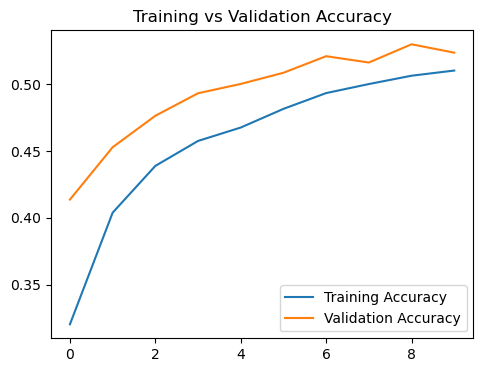

In [61]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')


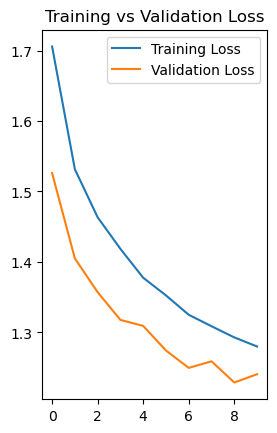

In [63]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

In [65]:
test_loss, test_acc = model.evaluate(test_generator)


225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5246 - loss: 1.2510


In [67]:
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.5235
Test Loss: 1.2406


In [ ]:
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 125s 140ms/step - accuracy: 0.5174 - loss: 1.2674 - val_accuracy: 0.5215 - val_loss: 1.2301
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ -3499s -3900692us/step - accuracy: 0.5237 - loss: 1.2431 - val_accuracy: 0.5308 - val_loss: 1.2116
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.5221 - loss: 1.2433 - val_accuracy: 0.5334 - val_loss: 1.2216
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 106ms/step - accuracy: 0.5355 - loss: 1.2182 - val_accuracy: 0.5323 - val_loss: 1.2089
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 96s 107ms/step - accuracy: 0.5296 - loss: 1.2217 - val_accuracy: 0.5313 - val_loss: 1.2296
Epoch 6/30
266/898 ━━━━━━━━━━━━━━━━━━━━ 1:01 98ms/step - accuracy: 0.5323 - loss: 1.2206

In [104]:
loaded_model = tf.keras.models.load_model("emotion_detector.h5")

In [106]:
loaded_model

<Sequential name=sequential, built=True>

In [53]:
loaded_model = tf.keras.models.load_model("emotion_detector.h5")

In [55]:
loaded_model

<Sequential name=sequential, built=True>

In [57]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image (replace with your file path)
img_path = "PrivateTest_731447.jpg"
img = image.load_img(img_path, target_size=(48, 48))  # Resize to match your model input size

# Convert to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize if your model was trained with normalized images

# Predict
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get the class index
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
Predicted Class: 0


In [59]:
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Load and preprocess your image
img_path = "PrivateTest_518212.jpg"
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = loaded_model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]

print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class Index: 4
Predicted Label: Neutral
